# **`Análisis exploratorio de los datos`**: _(Exploratory Data Analysis-EDA)_

Ya los datos están limpios, ahora es tiempo de investigar las relaciones que hay entre las variables de los datasets, ver si hay outliers o anomalías (que no tienen que ser errores necesariamente :eyes: ), y ver si hay algún patrón interesante que valga la pena explorar en un análisis posterior. Las nubes de palabras dan una buena idea de cuáles palabras son más frecuentes en los títulos, ¡podría ayudar al sistema de recomendación! Sabes que puedes apoyarte en librerías como _pandas profiling, missingno, sweetviz, autoviz_, entre otros y sacar de allí tus conclusiones 😉

Importamos las librerias y herramientas a usar en nuestro EDA

In [35]:
import pandas as pd 
from ydata_profiling import ProfileReport
import re 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import ast 
from collections import Counter
import itertools 
import nltk as nlt
nlt.download('stopwords')
nlt.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pabloclementi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pabloclementi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


 Cargamos el data frame , ya unido peliculas_crew contiene los datos de las peliculas con sus actores y directores. 
 Podras ver como se hizo la union de los dos dataframe originales en el Notebook Joindataframes.

In [36]:
#Cargamos el data frame en la variable df_eda para comenzar con el proceso de EDA. 
ruta_archivo = 'data/peliculas_crew_df.csv'
df_eda = pd.read_csv((ruta_archivo),encoding= 'utf8')


In [37]:
#Primero identificamos el tipo de dato de cada columna y realizamos cambios. 
df_eda.dtypes 
#Notamos que la columna `release_date` deberia ser de tipo datatime, y la columna `runtime `, de tipo float.
df_eda['release_date']= (pd.to_datetime(df_eda['release_date'],errors='coerce'))
df_eda['runtime'] =(pd.to_numeric(df_eda['runtime'],errors= 'coerce'))
#Verificamos los tipos de datos 
df_eda.dtypes


id                                   int64
spoken_languagesname                object
genresname                          object
title                               object
budget                             float64
revenue                            float64
overview                            object
release_date                datetime64[ns]
vote_average                       float64
vote_count                         float64
popularity                         float64
runtime                            float64
status                              object
tagline                             object
production_companiesname            object
production_countriesname            object
release_year                       float64
return                             float64
director                            object
actor                               object
dtype: object

Con la Libreria Y_data , realizamos un EDA, superficial y guardamos en archivo HTML, que se encuentra en la carpeta /data .
Ahi podras seleccionar las variables por separadas y ver su comportamiento. Es de gran ayuda para tu proceso. 

In [38]:
# profile= ProfileReport(df_eda, title= 'EDA')
# profile.to_notebook_iframe()


In [39]:
# profile.to_file("EDA.html")

In [40]:
#Luego de analizar las diferentes columnas, pasamos a eliminar diferentes datos que no  seran utiles al momento de la creacion 
#de nuestro modelo de recomendacion. 
#Primero eliminamos aquellas filas de la columna de 'title' donde los caracteres de la columna de 'title' no esten en alfabeto tradicional A-z a-Z, incluyendo numeros 0-9, y algunos caracteres especiales como los signos $#@!?¿
#Creamos funcion para la eliminacion de caracteres "raros", y nos quedamos con el alfabeto romano , numeros, y algunos caracteres especiales 

def limpieza_idiomas_atipicos(df, column_name):
    """
    Mantiene las filas donde la columna especificada contiene solo caracteres A-Z, a-z, 0-9 y algunos caracteres especiales.
    Parameteros:
    df (pd.DataFrame): El DataFrame original luego de la union
    column_name (str): El nombre de la columna a evaluar.
    Returns:
    pd.DataFrame: El DataFrame con las filas limpias.
    """
    # Definir el patrón regex para títulos que contienen solo caracteres romanos y algunos caracteres especiales
    patron = re.compile(r'^[A-Za-z0-9$#@!?¿ ]+$')
    
    # Crear una máscara para las filas que coinciden con el patrón
    mask = df[column_name].apply(lambda x: bool(patron.match(str(x))))
    
    # Filtrar el DataFrame para mantener solo las filas que coinciden con el patrón
    df_limpio = df[mask]
    
    return df_limpio


df_eda=limpieza_idiomas_atipicos(df_eda, 'title')
df_eda.head()
# Si bien hay muchos caracteres especiales e idiomas como el Koreano en otras columnas , se decidio optar por la columna titulo, ya que nuestro
# modelo de recomendación se le debera ingresar un titulo como parametro. 


,id,spoken_languagesname,genresname,title,budget,revenue,overview,release_date,vote_average,vote_count,popularity,runtime,status,tagline,production_companiesname,production_countriesname,release_year,return,director,actor
1,10000,Español,"Comedy, Drama",La estrategia del caracol,0.0,0.0,A group of tenants living in an old house are ...,1993-12-25,7.2,9.0,0.281609,116.0,Released,SinDato,Ministère de la Culture et de la Francophonie,Colombia,1993.0,0.0,Sergio Cabrera,NaN
2,10001,English,"Comedy, Science Fiction",Young Einstein,0.0,0.0,Albert Einstein is the son of a Tasmanian appl...,1988-12-15,4.5,46.0,2.562888,91.0,Released,E=mc²,Warner Bros.,Australia,1988.0,0.0,Yahoo Serious,"Yahoo Serious, Odile Le Clezio, Peewee Wilson,..."
3,100010,English,"War, Drama",Flight Command,0.0,0.0,"A rookie flyer, Ens. Alan Drake, joins the fam...",1940-12-27,6.0,1.0,0.769266,116.0,Released,"T-H-R-I-L-L AMERICA! Here come The Flying ""HEL...",Metro-Goldwyn-Mayer (MGM),United States of America,1940.0,0.0,Frank Borzage,"Robert Taylor, Ruth Hussey, Walter Pidgeon, Pa..."
4,100017,Deutsch,Drama,Hounded,0.0,0.0,Deals with the obsessive relationship between ...,2006-08-06,4.8,7.0,2.964103,87.0,Released,SinDato,MMM Film Zimmermann & Co,Germany,2006.0,0.0,Angelina Maccarone,"Kostja Ullmann, Maren Kroymann, Moritz Grove, ..."
5,10002,English,"Romance, Crime, Drama",Mona Lisa,0.0,5794184.0,"George has just been released from prison, and...",1986-06-13,6.7,62.0,3.095584,104.0,Released,SinDato,The Criterion Collection,United Kingdom,1986.0,0.0,Neil Jordan,"Bob Hoskins, Cathy Tyson, Michael Caine, Robbi..."


In [41]:
#Al limpiar los lenguajes atipicos se notan caracteres insuales como comas y signo de interrogacion en el inicio y entremedio de los idiomas 
# separados por comas  los cuales son remplazados/eliminados.
df_eda['spoken_languagesname'] = df_eda['spoken_languagesname'].str.replace(r'^,+', '', regex=True)
df_eda['spoken_languagesname'] = df_eda['spoken_languagesname'].str.replace(r'^[?,]+', '', regex=True).str.strip(',')
df_eda

,id,spoken_languagesname,genresname,title,budget,revenue,overview,release_date,vote_average,vote_count,popularity,runtime,status,tagline,production_companiesname,production_countriesname,release_year,return,director,actor
1,10000,Español,"Comedy, Drama",La estrategia del caracol,0.0,0.0,A group of tenants living in an old house are ...,1993-12-25,7.2,9.0,0.281609,116.0,Released,SinDato,Ministère de la Culture et de la Francophonie,Colombia,1993.0,0.0,Sergio Cabrera,NaN
2,10001,English,"Comedy, Science Fiction",Young Einstein,0.0,0.0,Albert Einstein is the son of a Tasmanian appl...,1988-12-15,4.5,46.0,2.562888,91.0,Released,E=mc²,Warner Bros.,Australia,1988.0,0.0,Yahoo Serious,"Yahoo Serious, Odile Le Clezio, Peewee Wilson,..."
3,100010,English,"War, Drama",Flight Command,0.0,0.0,"A rookie flyer, Ens. Alan Drake, joins the fam...",1940-12-27,6.0,1.0,0.769266,116.0,Released,"T-H-R-I-L-L AMERICA! Here come The Flying ""HEL...",Metro-Goldwyn-Mayer (MGM),United States of America,1940.0,0.0,Frank Borzage,"Robert Taylor, Ruth Hussey, Walter Pidgeon, Pa..."
4,100017,Deutsch,Drama,Hounded,0.0,0.0,Deals with the obsessive relationship between ...,2006-08-06,4.8,7.0,2.964103,87.0,Released,SinDato,MMM Film Zimmermann & Co,Germany,2006.0,0.0,Angelina Maccarone,"Kostja Ullmann, Maren Kroymann, Moritz Grove, ..."
5,10002,English,"Romance, Crime, Drama",Mona Lisa,0.0,5794184.0,"George has just been released from prison, and...",1986-06-13,6.7,62.0,3.095584,104.0,Released,SinDato,The Criterion Collection,United Kingdom,1986.0,0.0,Neil Jordan,"Bob Hoskins, Cathy Tyson, Michael Caine, Robbi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45341,99946,NaN,Comedy,Exit Smiling,0.0,0.0,Beatrice Lillie and Jack Pickford star in this...,1926-11-06,8.5,2.0,0.202315,77.0,Released,SinDato,Metro-Goldwyn-Mayer (MGM),United States of America,1926.0,0.0,Sam Taylor,"Beatrice Lillie, Jack Pickford, Doris Lloyd, D..."
45342,9995,English,"Action, Drama, Crime",Turn It Up,0.0,0.0,Trying to bootstrap his way out of Brooklyn's ...,2000-09-06,5.0,5.0,1.316179,86.0,Released,How you gonna win?,New Line Cinema,United States of America,2000.0,0.0,Robert Adetuyi,"Jason Statham, Vondie Curtis-Hall, Tamala Jone..."
45343,9997,English,"Fantasy, Action, Horror, Science Fiction",Gabriel,0.0,0.0,Gabriel tells the story of an archangel who fi...,2007-11-15,5.0,77.0,3.840024,109.0,Released,Far From Grace,HILT Productions,Australia,2007.0,0.0,Shane Abbess,"Dwaine Stevenson, Jack Campbell, Erika Heynatz..."
45344,99977,English,Comedy,Hot Stuff,0.0,0.0,When a police department's burglary task force...,1979-08-10,7.8,6.0,0.215778,91.0,Released,You can't turn this mob over to the cops. They...,Rastar Pictures,SinDato,1979.0,0.0,Dom DeLuise,"Dom DeLuise, Suzanne Pleshette, Jerry Reed, Os..."


In [42]:
null_counts = df_eda.isnull().sum()
print("Valores nulos por columna:")
print(null_counts) #Observamos ciertas cantidades de datos nulos, donde remplazaremos por "SinDato", en las variables cateogoricas. 


Valores nulos por columna:
id                             0
spoken_languagesname        2957
genresname                  1830
title                          0
budget                         0
revenue                        0
overview                       5
release_date                   0
vote_average                   0
vote_count                     0
popularity                     0
runtime                      138
status                         0
tagline                        0
production_companiesname       0
production_countriesname       0
release_year                   0
return                         0
director                     517
actor                       1763
dtype: int64


In [43]:
valores_unicos= df_eda["runtime"].unique() 


# Asegurarse de que los valores sean del tipo float
valores_unicos= valores_unicos.astype(float) 
unique_values_sorted = sorted(valores_unicos, reverse=True)
unique_values_list = [f"{value:.2f}" for value in sorted(unique_values_sorted, reverse=True)] 
print(unique_values_list)

#Detectamos outliers en la columna runtime , pero notamos que son series/documentales al investigar es decir no son errores y es la sumatoria de sus capitulos.
#Y rellenamos los valores en 0 o nullos por el promedio de duracion. 
df_eda['runtime'] = df_eda['runtime'].fillna(df_eda['runtime'].mean())
df_eda['runtime'] = df_eda['runtime'].replace(0, df_eda['runtime'].mean())

df_eda['runtime'] = df_eda['runtime'].astype('float64')
df_eda['runtime'] = df_eda['runtime'].astype('int64')


['1256.00', '1140.00', '501.00', '485.00', '417.00', '366.00', '360.00', '340.00', '320.00', '287.00', '270.00', '260.00', '255.00', '254.00', '252.00', '250.00', '245.00', '244.00', '242.00', '240.00', '239.00', '236.00', '235.00', '223.00', '216.00', '210.00', '208.00', '206.00', '204.00', '200.00', '197.00', '195.00', '192.00', '191.00', '185.00', '184.00', '183.00', '182.00', '181.00', '180.00', '179.00', '178.00', '177.00', '175.00', '174.00', '172.00', '171.00', '170.00', '169.00', '168.00', '167.00', '166.00', '165.00', '164.00', '162.00', '161.00', '160.00', '159.00', '158.00', '157.00', '155.00', '154.00', '153.00', '152.00', '151.00', '150.00', '149.00', '148.00', '147.00', '146.00', '145.00', '144.00', '143.00', '142.00', '141.00', '140.00', '139.00', '138.00', '137.00', '136.00', '135.00', '134.00', '133.00', '132.00', '131.00', '130.00', '129.00', '128.00', '127.00', '126.00', '125.00', '124.00', '123.00', '122.00', '121.00', '120.00', '119.00', '118.00', '117.00', '116.00

In [44]:
#Decidimos rellenar los datos ausentes o nulos en las columnas descriptivas por 'Sin Dato' 
df_eda['genresname'] = df_eda['genresname'].fillna('Sin Dato')
df_eda['spoken_languagesname'] = df_eda['spoken_languagesname'].fillna('Sin Dato')
df_eda['production_companiesname'] = df_eda['production_companiesname'].fillna('Sin Dato')
df_eda['production_countriesname'] = df_eda['production_countriesname'].fillna('Sin Dato')
df_eda['spoken_languagesname'] = df_eda['spoken_languagesname'].fillna('Sin Dato')
df_eda['spoken_languagesname'] = df_eda['spoken_languagesname'].fillna('Sin Dato') 
df_eda['actor']= df_eda['actor'].fillna('Sin Dato')
df_eda['director'] = df_eda['director'].fillna('Sin Dato') 
df_eda['overview'] = df_eda['overview'].fillna('Sin Dato')
#Verificamos ejecutando nuevamente la linea de codigo anterior de Nulls count y verificamos que esta en 0 



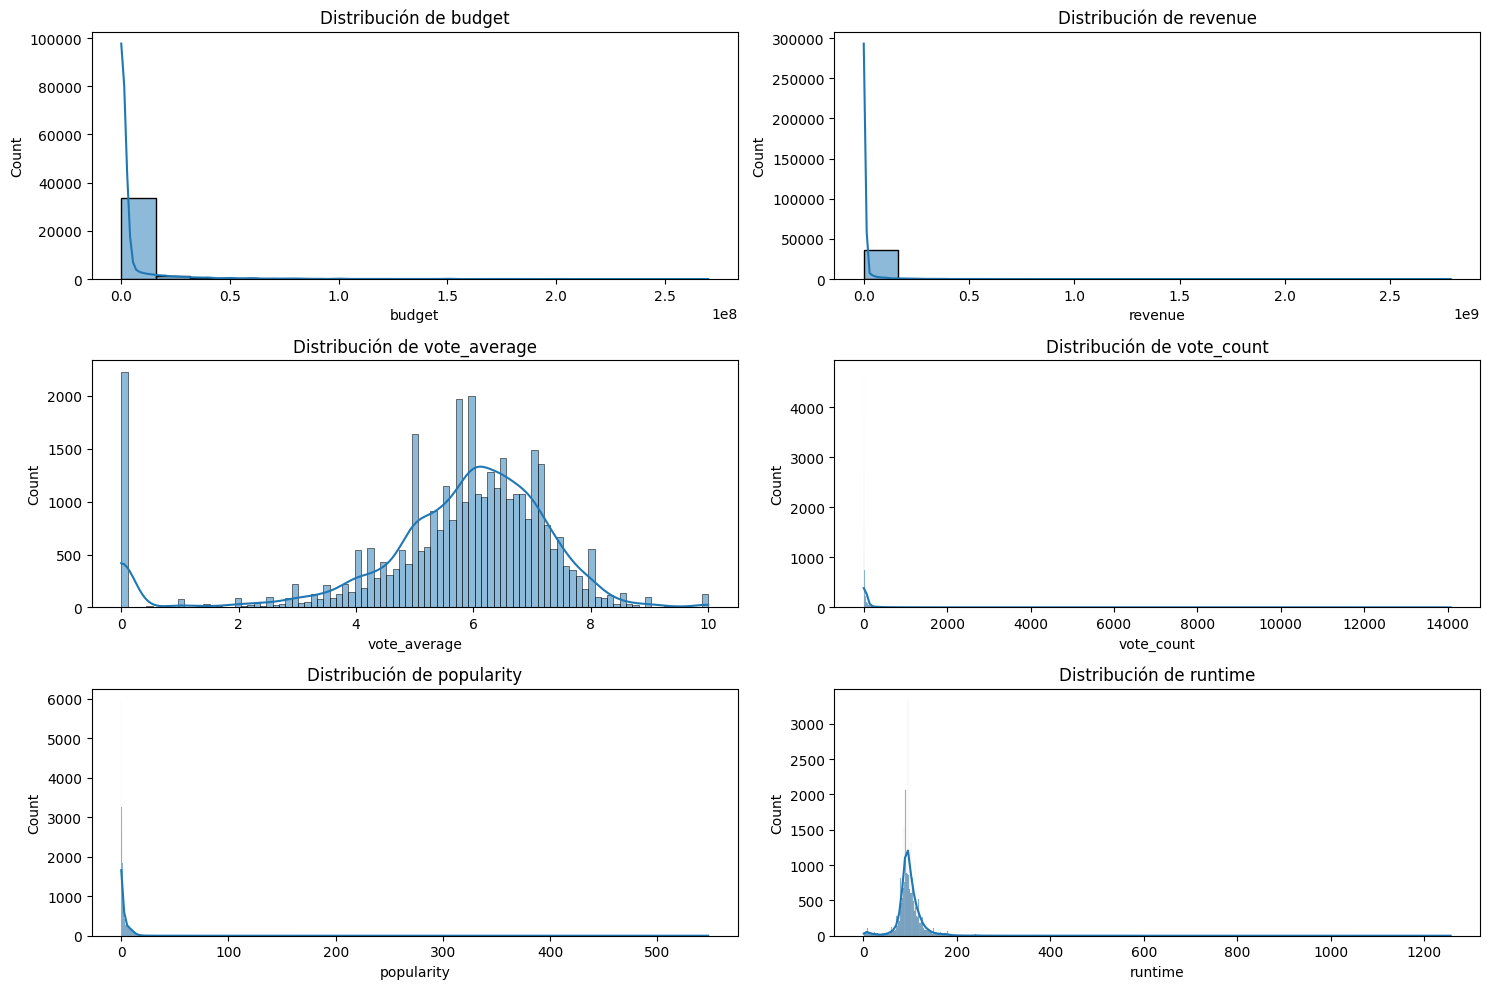

In [45]:
#Distribución de Datos

# Distribución de Variables Numéricas:
# ¿Cómo se distribuyen budget, revenue, vote_average, vote_count, popularity y runtime?
# Distribución de Variables Categóricas:
# ¿Cuál es la distribución de genresname, spoken_languagesname, production_companiesname y production_countriesname? 
# Para que los gráficos se muestren en Jupyter Notebook
%matplotlib inline 

#Agrupamos todas las variables numericas .

variables_numericas  = ['budget', 'revenue', 'vote_average', 'vote_count', 'popularity', 'runtime'] 

# Crear histogramas para cada variable numérica
plt.figure(figsize=(15, 10))

for i, col in enumerate(variables_numericas):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df_eda[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()


# Conclusion: donde claramente vemos que la variable vote average es la que tiene una distribucion mas uniforme y menos sesgada.

<Figure size 1000x1000 with 0 Axes>

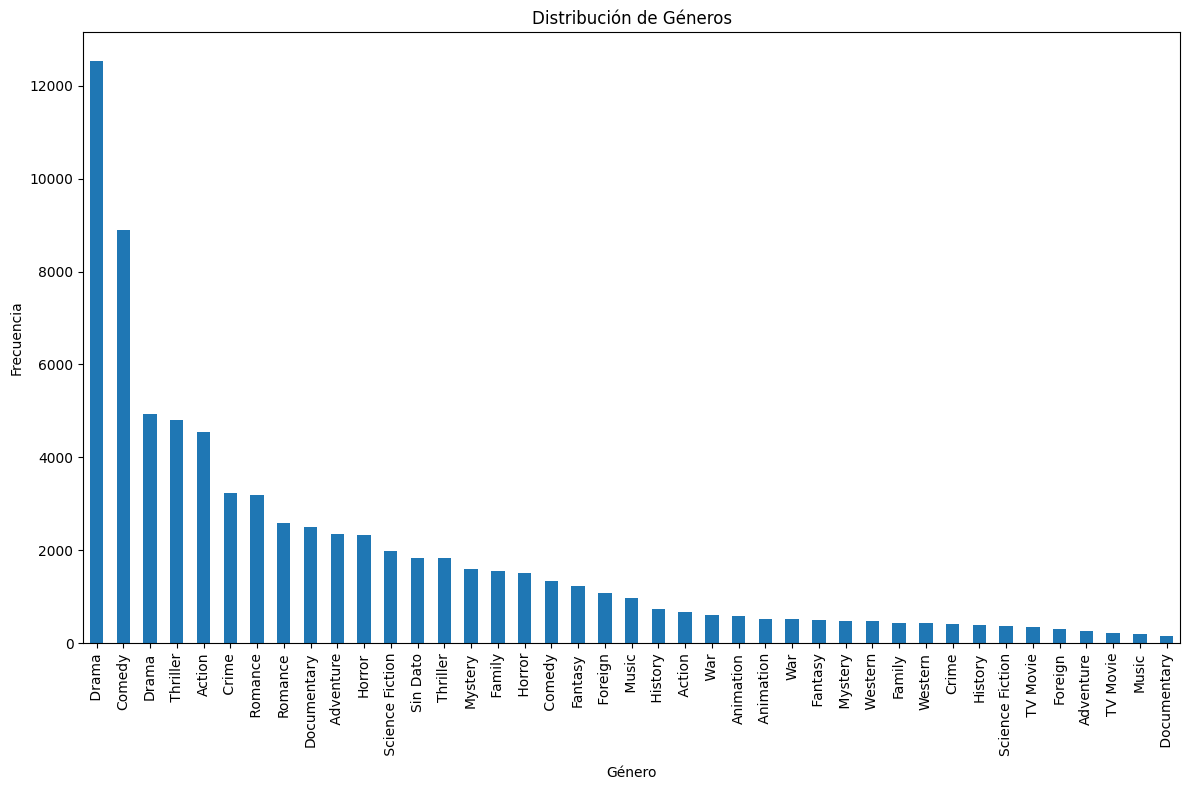

In [46]:
# Distribución de Variables Categóricas:
# ¿Cuál es la distribución de genresname? 

variables_categoricas1 = ['genresname']  

# Crear gráficos de barras para la variable genersname

plt.figure(figsize=(10, 10))

genre_counts = df_eda['genresname'].str.split(',', expand=True).stack().value_counts()

# Graficar la frecuencia de géneros
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar')
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

#Se noto que algunos generos estan repetidos. 

Analizamos la variable de idiomas

In [47]:
# Remover espacios en blanco alrededor de cada idioma y dividir por comas
df_eda['spoken_languagesname'] = df_eda['spoken_languagesname'].apply(lambda x: ','.join([lang.strip() for lang in x.split(',')]))

# Eliminar espacios en blanco adicionales que podrían causar duplicados
df_eda['spoken_languagesname'] = df_eda['spoken_languagesname'].apply(lambda x: ','.join(sorted(set(x.split(',')))))


In [48]:
unique_languages = df_eda['spoken_languagesname'].unique()
print(unique_languages)

# Se observan Idiomas repetidos. 

['Español' 'English' 'Deutsch' ... 'English,Português,普通话'
 'Español,Français,普通话' 'Deutsch,English,Magyar,Português']


In [49]:
# Función para obtener todos los idiomas únicos
def obtener_idiomas_unicos(df, columna):
    # Dividir y concatenar todos los idiomas únicos
    idiomas_unicos = set()
    for idiomas in df[columna].str.split(r'[,|]'):  # Utilizamos una expresión regular para separar por coma o barra vertical
        idiomas_unicos.update(idiomas)
    return idiomas_unicos

In [50]:
unique_languages= obtener_idiomas_unicos(df_eda, 'spoken_languagesname')
print(unique_languages)
df_eda['spoken_languagesname'] = df_eda['spoken_languagesname'].str.replace(r'^,+', '', regex=True)
df_eda['spoken_languagesname'] = df_eda['spoken_languagesname'].str.replace(r'^[?,]+', '', regex=True).str.strip(',')
#Completamos los valores faltantes con SinDato. 
df_eda['spoken_languagesname'] = df_eda['spoken_languagesname'].fillna('Sin Dato')
df_eda['spoken_languagesname'] = df_eda['spoken_languagesname'].replace(np.nan, 'Sin Dato')
df_eda['spoken_languagesname'] = df_eda['spoken_languagesname'].replace('', 'Sin Dato')
df_eda['spoken_languagesname'] = df_eda['spoken_languagesname'].replace(' ', 'Sin Dato')
df_eda['spoken_languagesname'] = df_eda['spoken_languagesname'].replace('None', 'Sin Dato')
df_eda['spoken_languagesname'] = df_eda['spoken_languagesname'].replace('nan', 'Sin Dato')


{'', 'ภาษาไทย', 'Bokmål', 'Slovenčina', '한국어/조선말', 'עִבְרִית', 'Slovenščina', 'Deutsch', 'ქართული', 'Bamanankan', 'shqip', 'پښتو', 'Kiswahili', 'Kinyarwanda', 'العربية', 'Gaeilge', 'Tiếng Việt', 'Malti', 'தமிழ்', 'suomi', 'Polski', '日本語', 'हिन्दी', 'Esperanto', '?????', 'Pусский', 'Català', 'Somali', 'Sin Dato', 'Lietuvi\x9akai', 'ελληνικά', 'Český', 'Hrvatski', 'Afrikaans', 'Srpski', 'Türkçe', 'isiZulu', 'Dansk', 'Український', 'Azərbaycan', 'български език', 'Español', 'Galego', 'Fulfulde', 'Magyar', 'қазақ', 'Hausa', 'беларуская мова', 'Eesti', 'বাংলা', 'Norsk', 'English', '普通话', 'اردو', 'فارسی', 'Nederlands', 'euskera', '广州话 / 廣州話', 'Română', 'No Language', 'Português', 'svenska', 'Bahasa melayu', 'ozbek', 'Latviešu', 'Cymraeg', 'Latin', '??????', 'ਪੰਜਾਬੀ', 'Íslenska', 'Bahasa indonesia', 'Bosanski', 'Wolof', 'తెలుగు', 'Français', 'Italiano'}


In [51]:
# Estandarizar los valores de la columna, al notar que habia comillas demas 
df_eda['spoken_languagesname'] = df_eda['spoken_languagesname'].str.replace(r"'+", '', regex=True).str.strip(',')

/var/folders/4k/b142n1x53kq0891h836m2hh80000gn/T/ipykernel_28911/3696488867.py:11: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
/var/folders/4k/b142n1x53kq0891h836m2hh80000gn/T/ipykernel_28911/3696488867.py:11: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  plt.tight_layout()
/var/folders/4k/b142n1x53kq0891h836m2hh80000gn/T/ipykernel_28911/3696488867.py:11: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  plt.tight_layout()
/var/folders/4k/b142n1x53kq0891h836m2hh80000gn/T/ipykernel_28911/3696488867.py:11: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  plt.tight_layout()
/var/folders/4k/b142n1x53kq0891h836m2hh80000gn/T/ipykernel_28911/3696488867.py:11: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  plt.tight_layout()
/var/folders/4k/b142n1x53kq0891h836m2hh80000gn/T/ipyker

<Figure size 1000x1000 with 0 Axes>

/Users/pabloclementi/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pabloclementi/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pabloclementi/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pabloclementi/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pabloclementi/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: Us

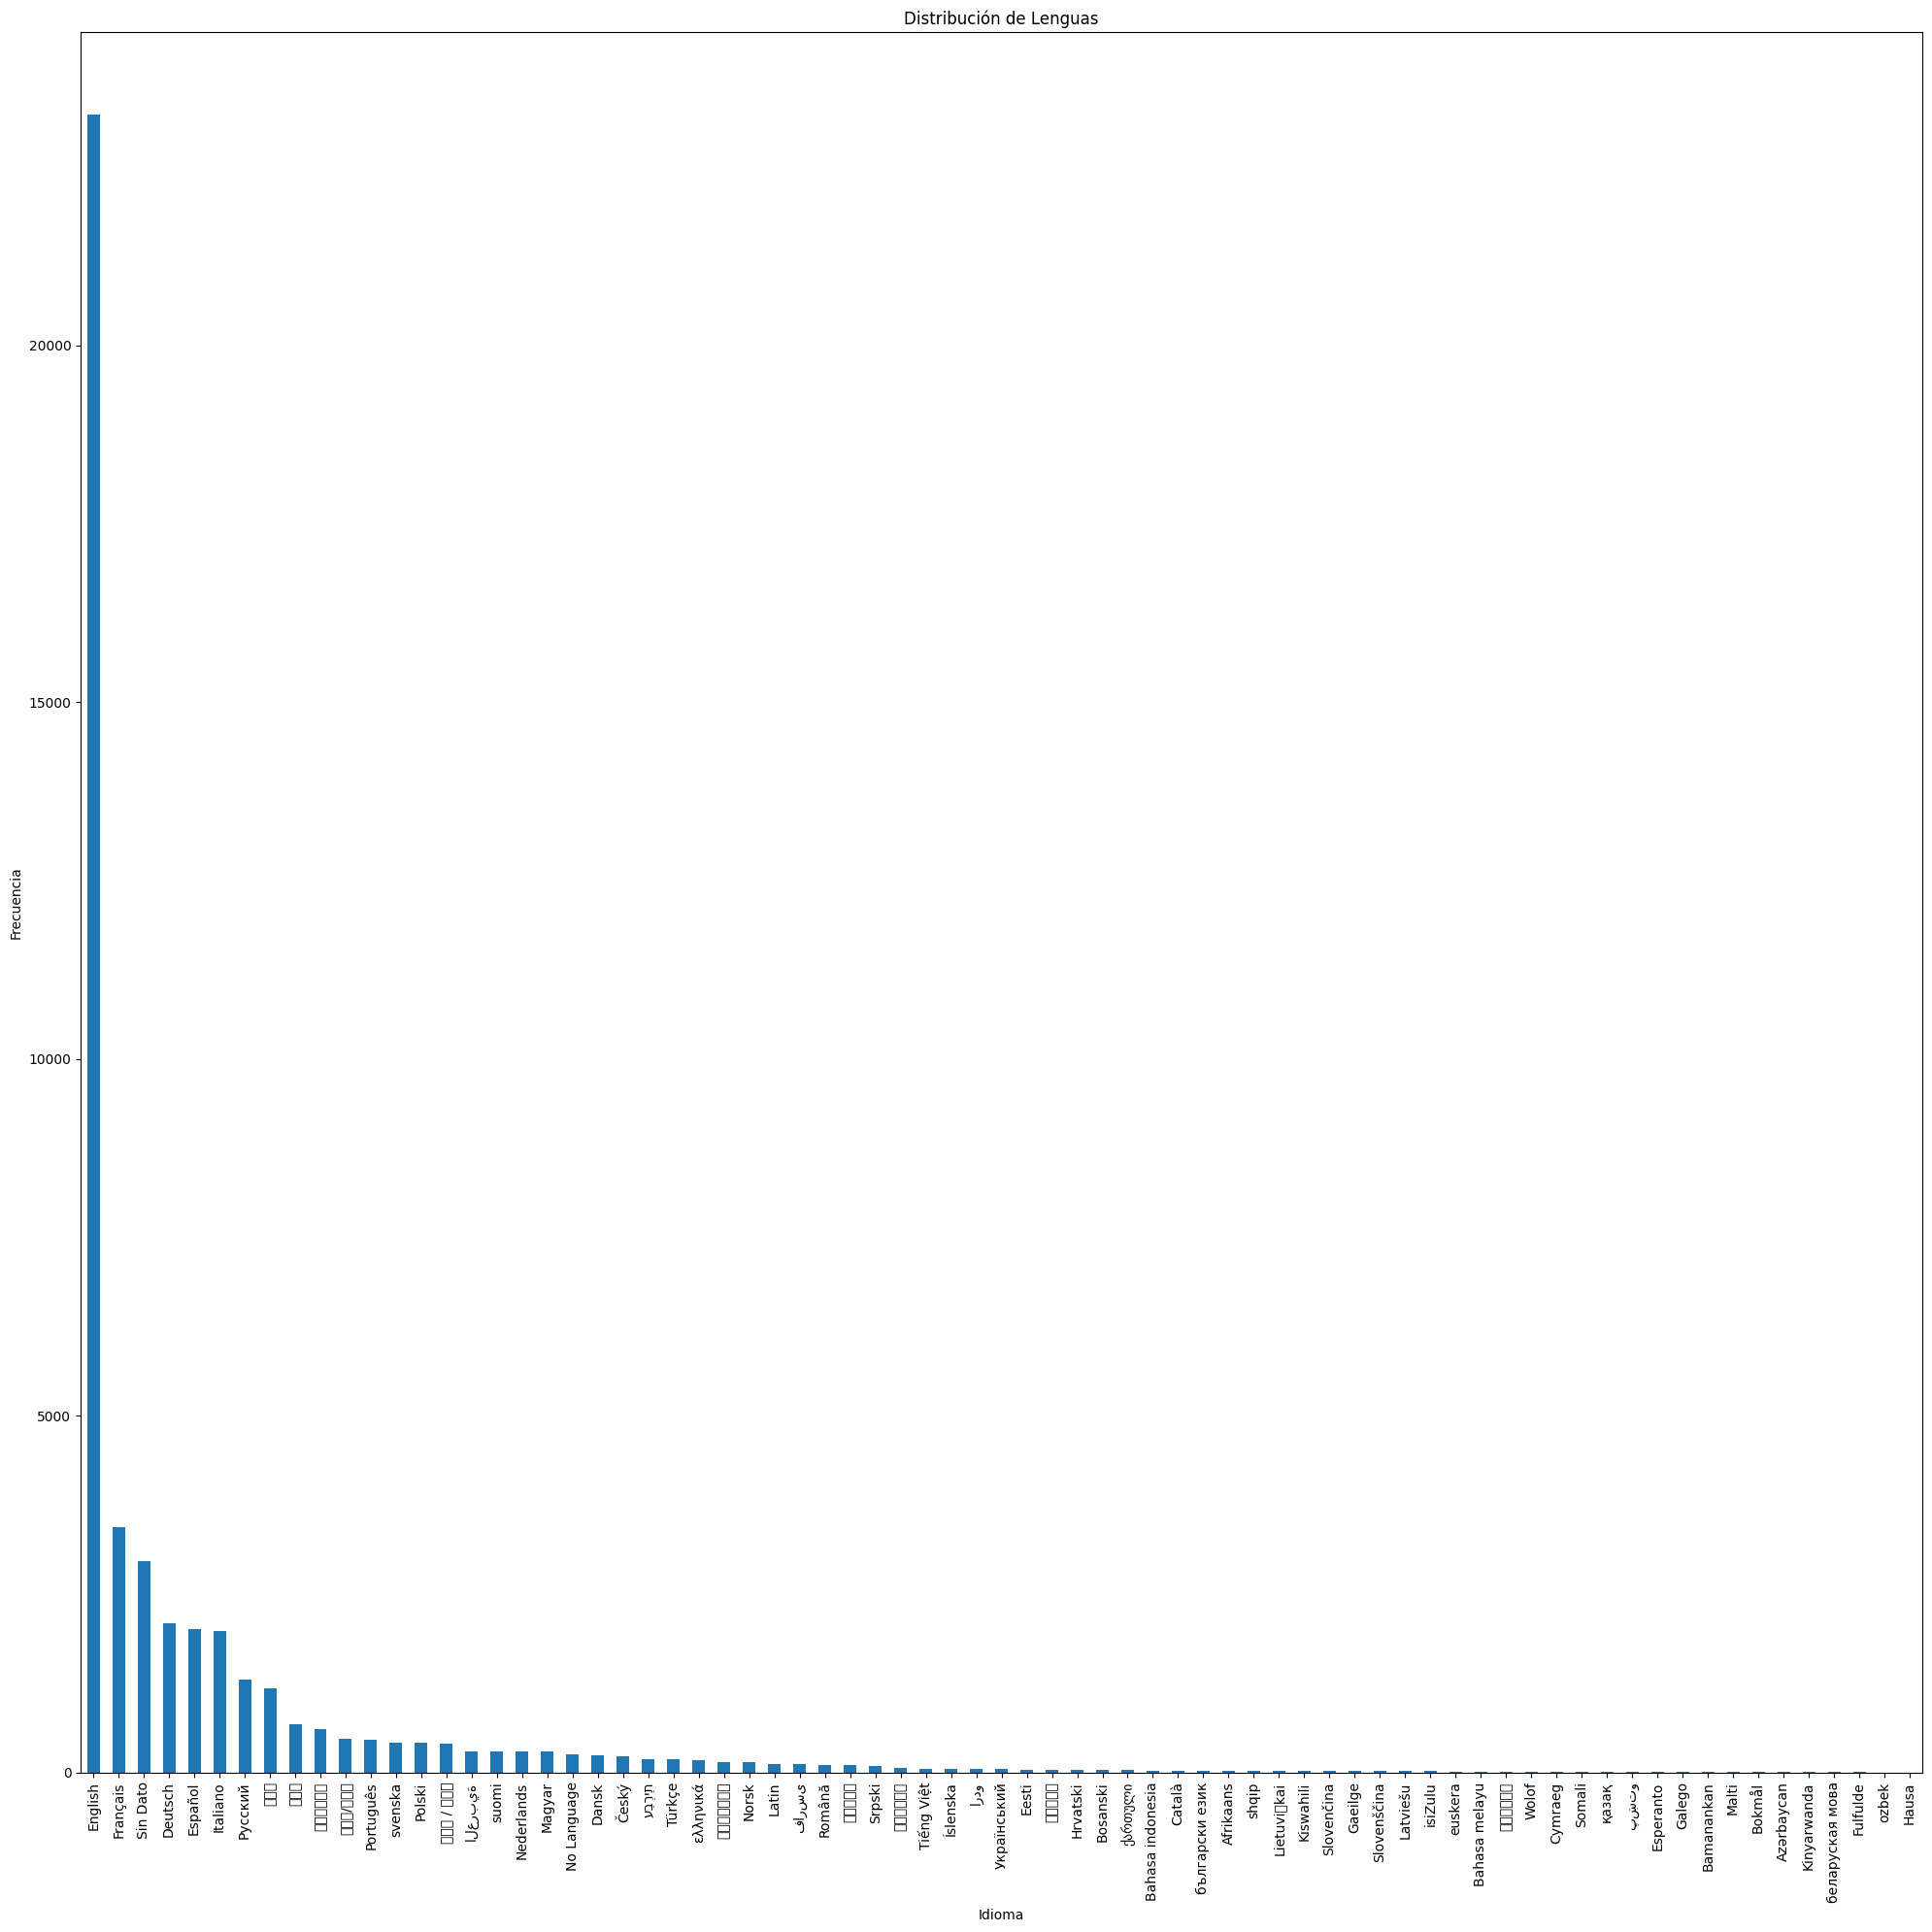

In [52]:
plt.figure(figsize=(10, 10))

languages_counts = df_eda['spoken_languagesname'].str.split(',', expand=True).stack().value_counts()

# Graficar la frecuencia de géneros
plt.figure(figsize=(20, 20))
languages_counts.plot(kind='bar')
plt.title('Distribución de Lenguas')
plt.xlabel('Idioma')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [53]:
#Ahora es el turno de production_companiesname 

variables_categoricas3 = ['production_companiesname']
# Analizamos la columna 
df_eda['production_companiesname'].value_counts()


production_companiesname
SinDato                                   9013
Paramount Pictures                         819
Metro-Goldwyn-Mayer (MGM)                  737
Twentieth Century Fox Film Corporation     643
Warner Bros.                               640
                                          ... 
KTF Films                                    1
Sparklight Films                             1
Waverly Films                                1
Portreeve                                    1
HILT Productions                             1
Name: count, Length: 9256, dtype: int64

Buscamos la matirz de correlacion de las variables numericas , y mostramos la correlacion entre ellas . 
Observando una alta correlacion y logica entre Budget y Revenue. Es deciri que mientras mayor presupuesto por lo general mayor es el revenue. 
Por otro lado vemos que el promedio de los votos de la pelicula no tiene relacion practicamente con estas dos variables, como si lo podria tener la cantidad de votos y la popularidad

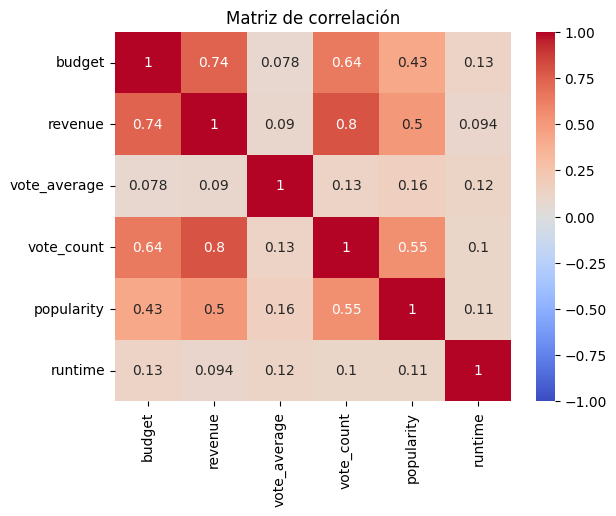

In [55]:
matriz_correlacion = df_eda[['budget', 'revenue', 'vote_average', 'vote_count', 'popularity', 'runtime']].corr()

# Mostrar matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()

En este paso corregimos el error previo de genersname que habia duplicados

In [56]:
# Convertir la columna 'genresname' en una lista de géneros
# Aplicar replace() para eliminar espacios en blanco en cualquier posición
df_eda['genresname'] = df_eda['genresname'].str.replace(r'\s+', '', regex=True)

df_eda['genresname'] = df_eda['genresname'].str.split(',')

df_expanded = df_eda.explode('genresname')

budget_by_genre = df_expanded.groupby('genresname')['budget'].mean().sort_values(ascending=False)


In [57]:
unique_genres = df_expanded['genresname'].unique()
print(unique_genres)

['Comedy' 'Drama' 'ScienceFiction' 'War' 'Romance' 'Crime' 'Horror'
 'Thriller' 'Adventure' 'Action' 'Fantasy' 'Mystery' 'SinDato' 'Animation'
 'Family' 'Foreign' 'Documentary' 'Music' 'History' 'Western' 'TVMovie']


/var/folders/4k/b142n1x53kq0891h836m2hh80000gn/T/ipykernel_28911/1984616024.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=budget_by_genre.index, y=budget_by_genre.values, palette='viridis')


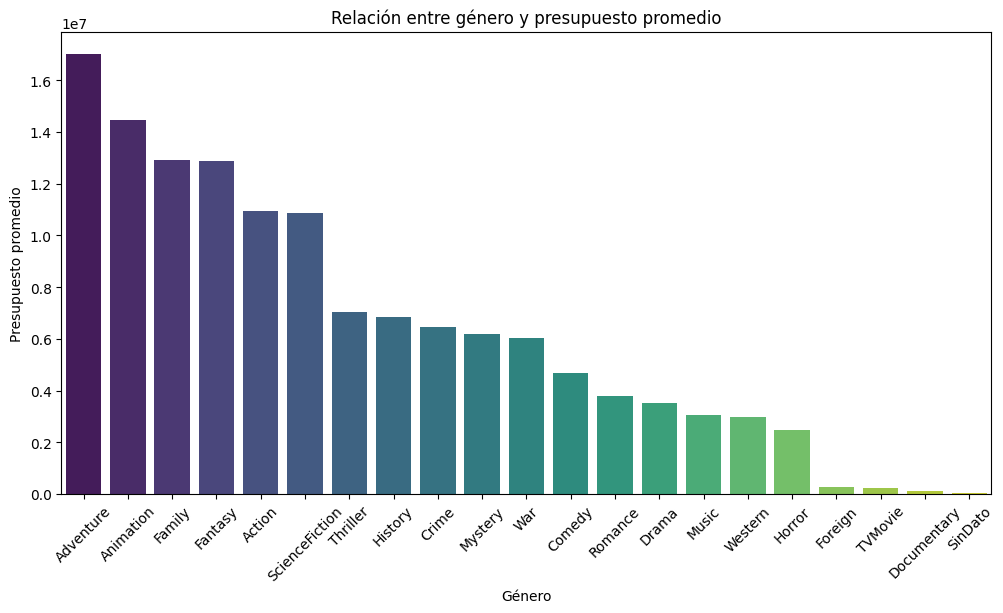

In [58]:
# Graficar la relación entre género y presupuesto
plt.figure(figsize=(12, 6))
sns.barplot(x=budget_by_genre.index, y=budget_by_genre.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Género')
plt.ylabel('Presupuesto promedio')
plt.title('Relación entre género y presupuesto promedio')
plt.show()

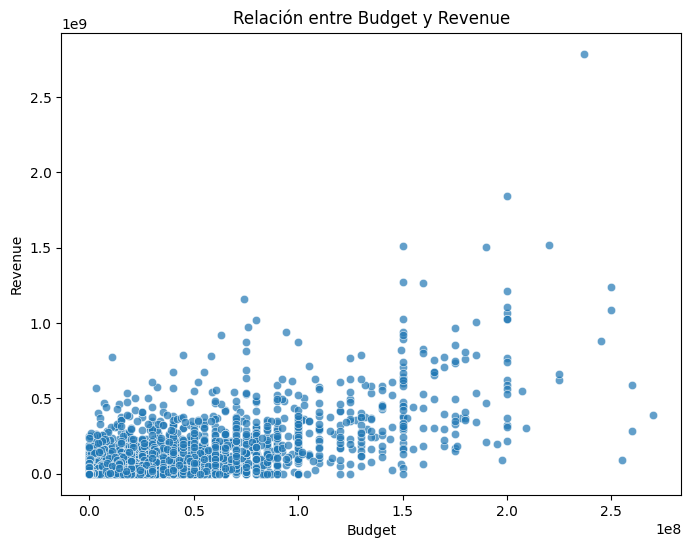

0.7392679367596298


In [59]:
# Calcula el coeficiente de correlación entre 'budget' y 'revenue'
correlacion_budget_revenue = df_eda['budget'].corr(df_eda['revenue'])

# Gráfico de dispersión 'budget' vs 'revenue'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='revenue', data=df_eda, alpha=0.7)
plt.title('Relación entre Budget y Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show() 
print(correlacion_budget_revenue)

In [60]:
# Seleccionamos las columnas de interés
columnas_analizar = ['budget', 'revenue', 'vote_average', 'vote_count', 'popularity', 'runtime',]
movies_data = df_eda[columnas_analizar]

# Revisamos si hay valores nulos y los manejamos
print(movies_data.isnull().sum())


budget          0
revenue         0
vote_average    0
vote_count      0
popularity      0
runtime         0
dtype: int64


In [61]:
print(movies_data.describe()) #Vemos la descripcion de las columnas a analizar

             budget       revenue  vote_average    vote_count    popularity  \
count  3.639800e+04  3.639800e+04  36398.000000  36398.000000  36398.000000   
mean   4.163889e+06  1.069664e+07      5.628474    109.707649      2.969842   
std    1.643834e+07  5.951107e+07      1.870364    481.167967      6.147330   
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000   
25%    0.000000e+00  0.000000e+00      5.000000      3.000000      0.407935   
50%    0.000000e+00  0.000000e+00      6.000000     10.000000      1.161972   
75%    0.000000e+00  0.000000e+00      6.800000     35.000000      3.842361   
max    2.700000e+08  2.787965e+09     10.000000  14075.000000    547.488298   

            runtime  
count  36398.000000  
mean      98.279686  
std       33.014565  
min        1.000000  
25%       88.000000  
50%       95.000000  
75%      107.000000  
max     1256.000000  


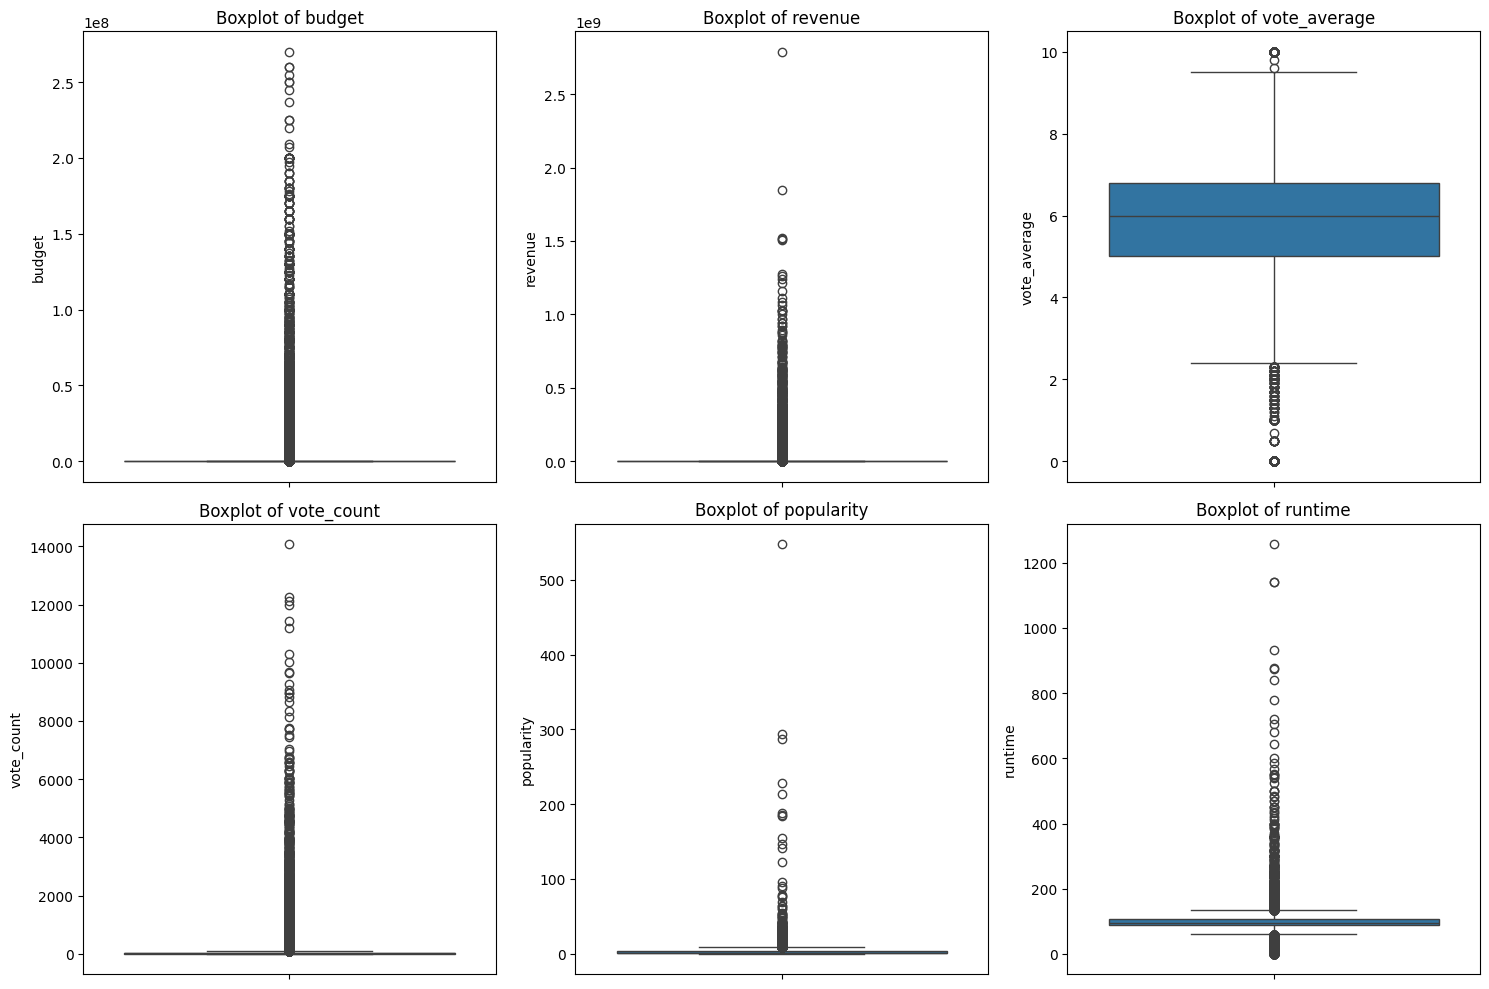

In [62]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columnas_analizar, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=movies_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [63]:
def encontrar_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outliers = {column: encontrar_outliers(movies_data, column) for column in columnas_analizar}
for column, outlier_data in outliers.items():
    print(f'Cantidad de outliers en  {column}: {len(outlier_data)}')

Cantidad de outliers en  budget: 7408
Cantidad de outliers en  revenue: 6158
Cantidad de outliers en  vote_average: 2679
Cantidad de outliers en  vote_count: 5535
Cantidad de outliers en  popularity: 3217
Cantidad de outliers en  runtime: 3570


# Outliers en terminos de ingresos. 
¿Qué características tienen las películas que son outliers en términos de ingresos (revenue)?

In [64]:
revenue_outliers = encontrar_outliers(movies_data, 'revenue')
print(f'Number of outliers in revenue: {len(revenue_outliers)}')

Number of outliers in revenue: 6158


In [71]:
# # Descripción estadística de las características de los outliers
characteristics_of_interest = ['budget', 'vote_average', 'vote_count', 'popularity', 'runtime',]
# print(revenue_outliers[characteristics_of_interest].describe())

# # Descripción estadística de todas las películas para comparación
# print(movies_data[characteristics_of_interest].describe())

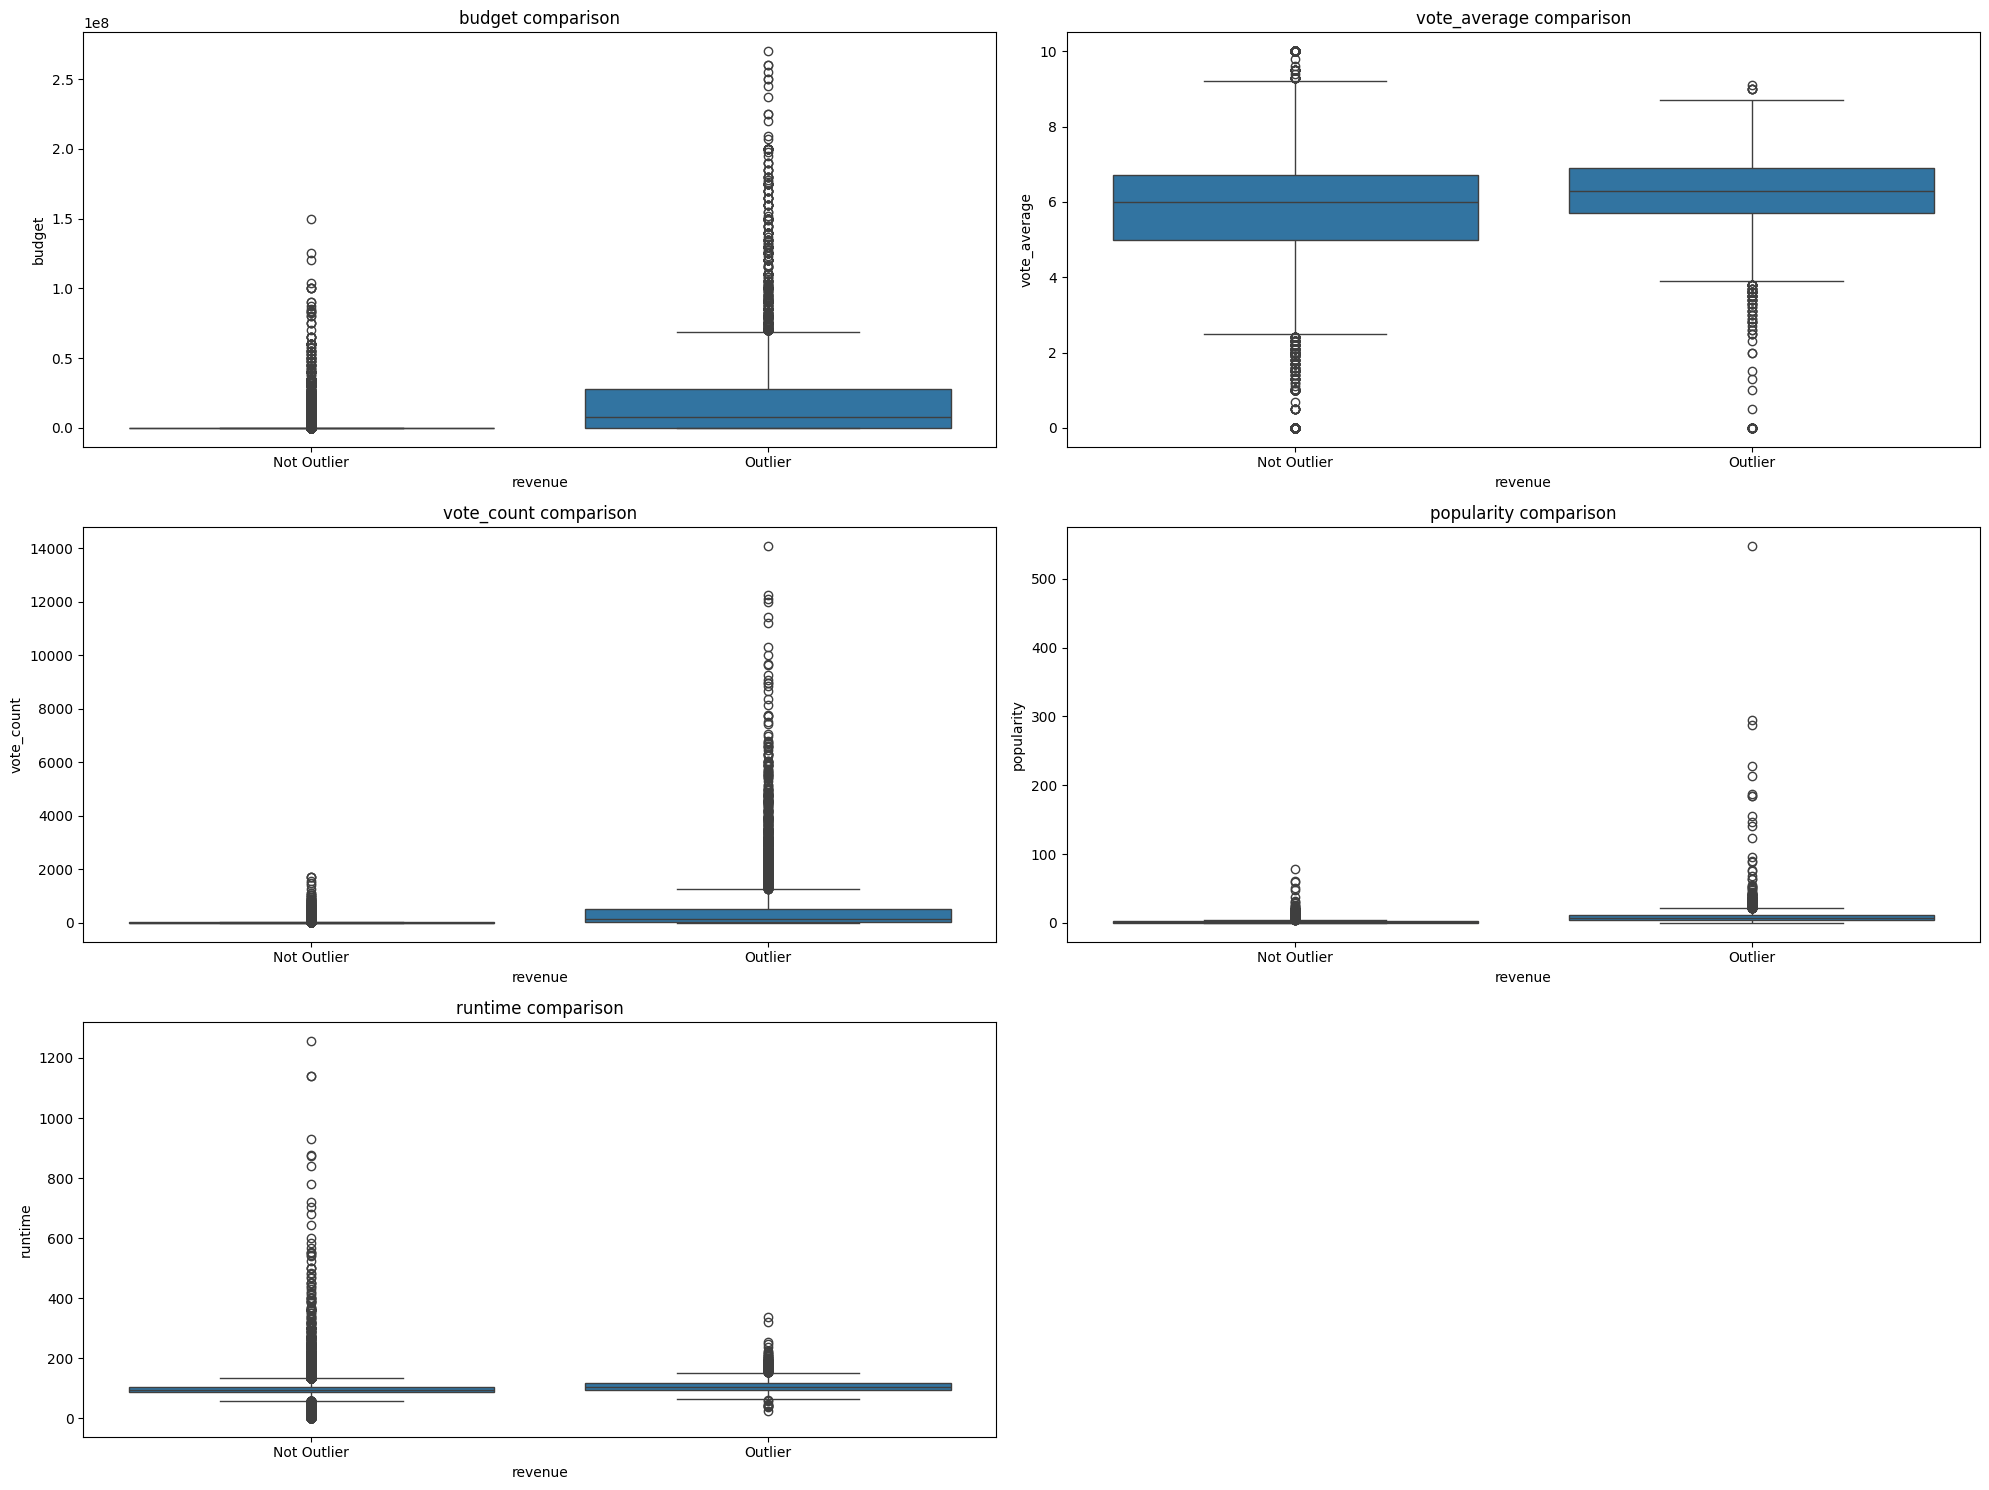

In [72]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(characteristics_of_interest, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=movies_data, x=movies_data['revenue'].apply(lambda x: 'Outlier' if x in revenue_outliers['revenue'].values else 'Not Outlier'), y=column)
    plt.title(f'{column} comparison')
plt.tight_layout()
plt.show()

# # Alternativamente, usar gráficos de violín
# plt.figure(figsize=(20, 15))
# for i, column in enumerate(characteristics_of_interest, 1):
#     plt.subplot(3, 2, i)
#     sns.violinplot(data=movies_data, x=movies_data['revenue'].apply(lambda x: 'Outlier' if x in revenue_outliers['revenue'].values else 'Not Outlier'), y=column)
#     plt.title(f'{column} comparison')
# plt.tight_layout()
# plt.show()

In [73]:
# # Aplanar la lista de géneros de los outliers
# outliers_genres = list(itertools.chain(*revenue_outliers['genresname']))

# # Contar la frecuencia de cada género entre los outliers
# outliers_genre_counts = Counter(outliers_genres)

# # Convertir el contador a un DataFrame para una mejor visualización
# outliers_genre_df = pd.DataFrame.from_dict(outliers_genre_counts, orient='index', columns=['count'])
# outliers_genre_df = outliers_genre_df.reset_index().rename(columns={'index': 'genresname'})
# outliers_genre_df = outliers_genre_df.sort_values(by='count', ascending=False)

# # Visualización
# plt.figure(figsize=(12, 8))
# sns.barplot(data=outliers_genre_df, x='count', y='genresname', order=outliers_genre_df['genresname'])
# plt.title('Genres of Revenue Outliers')
# plt.xlabel('Count')
# plt.ylabel('Genre')
# plt.show()

Analisis de palabras en titulos y overview, vemos las palabras que mas se repiten.

In [74]:
# Definir stopwords en inglés y español
stopwords_english = set(stopwords.words('english'))
stopwords_spanish = set(stopwords.words('spanish'))

In [75]:
# Función para limpiar texto
def clean_text(text):
    # Tokenización
    tokens = word_tokenize(text)
    # Eliminar signos de puntuación y convertir a minúsculas
    tokens = [word.lower() for word in tokens if word.isalpha()]
    # Filtrar stopwords en inglés y español
    tokens = [word for word in tokens if word not in stopwords_english and word not in stopwords_spanish]
    return tokens

In [76]:
movies_palabras = df_eda.copy()

In [77]:
# Aplicar limpieza a los títulos y descripciones
movies_palabras['clean_title'] = movies_palabras['title'].apply(lambda x: clean_text(x))
movies_palabras['clean_overview'] = movies_palabras['overview'].dropna().apply(lambda x: clean_text(x))

In [78]:
# Mostrar ejemplos de títulos limpios
print("Ejemplo de título limpio:")
print(movies_palabras['clean_title'].iloc[0])

# Mostrar ejemplos de descripciones limpias
print("Ejemplo de descripción limpia:")
print(movies_palabras['clean_overview'].iloc[0])

Ejemplo de título limpio:
['estrategia', 'caracol']
Ejemplo de descripción limpia:
['group', 'tenants', 'living', 'old', 'house', 'confronted', 'move', 'due', 'renovation', 'project', 'city', 'undertaken', 'tenants', 'decide', 'unite', 'come', 'strategy', 'landlord', 'aggressive', 'attorney', 'chasing', 'tenants', 'transform', 'opposite']


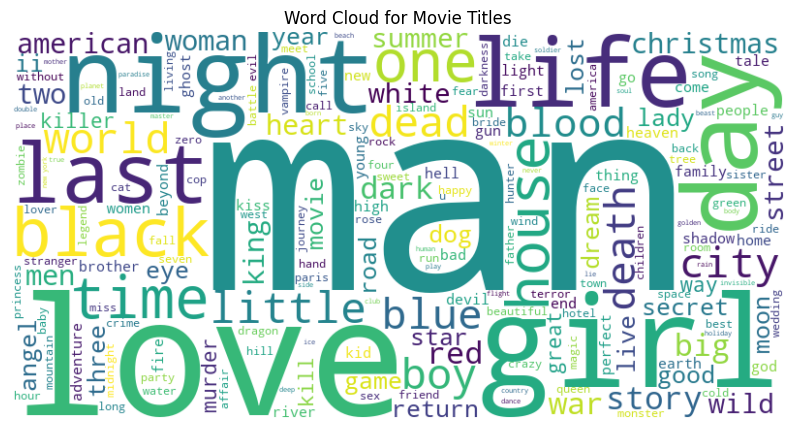

In [79]:
# Convertir la lista de palabras limpias de títulos en un solo texto
text_titles = ' '.join([' '.join(title) for title in movies_palabras['clean_title']])

# Crear la nube de palabras para títulos
wordcloud_titles = WordCloud(width=800, height=400, background_color='white').generate(text_titles)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_titles, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Titles')
plt.show()

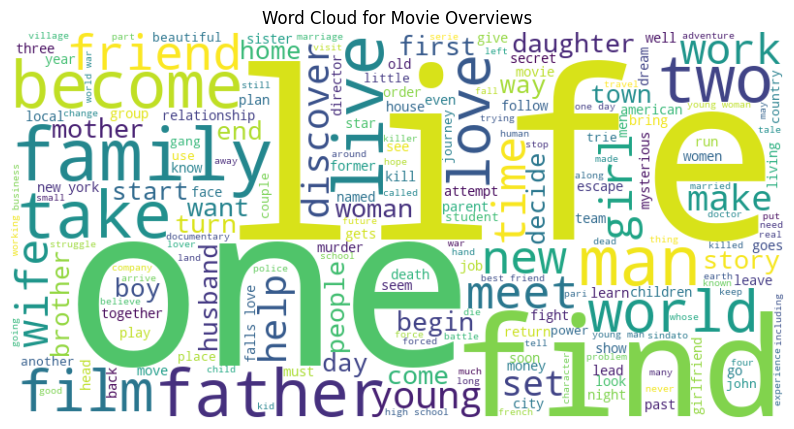

In [80]:
# Convertir la lista de palabras limpias de descripciones en un solo texto
text_overviews = ' '.join([' '.join(overview) for overview in movies_palabras['clean_overview']])

# Crear la nube de palabras para descripciones
wordcloud_overviews = WordCloud(width=800, height=400, background_color='white').generate(text_overviews)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_overviews, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Overviews')
plt.show()

In [81]:
# Agrupar por año y calcular el promedio
yearly_trends = movies_palabras.groupby('release_year')[['budget', 'revenue', 'popularity']].mean().reset_index()


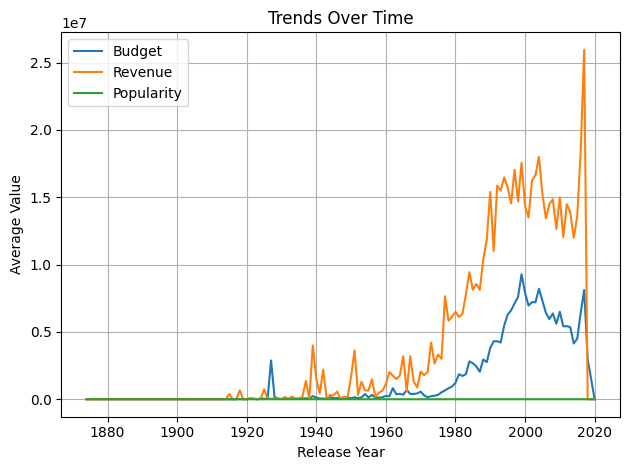

In [82]:
# Budget a lo largo del tiempo
sns.lineplot(data=yearly_trends, x='release_year', y='budget', label='Budget')

# Revenue a lo largo del tiempo
sns.lineplot(data=yearly_trends, x='release_year', y='revenue', label='Revenue')

# Popularity a lo largo del tiempo
sns.lineplot(data=yearly_trends, x='release_year', y='popularity', label='Popularity')

plt.title('Trends Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [83]:
df_eda.columns

Index(['id', 'spoken_languagesname', 'genresname', 'title', 'budget',
       'revenue', 'overview', 'release_date', 'vote_average', 'vote_count',
       'popularity', 'runtime', 'status', 'tagline',
       'production_companiesname', 'production_countriesname', 'release_year',
       'return', 'director', 'actor'],
      dtype='object')

In [84]:
#Preparamos el dataset para la construccion del modelo de prediccion 
#Primero vamos a eliminar las columnas que no utilizaremos. ()
df_recomendacion = df_eda.copy()
df_recomendacion = df_recomendacion.drop(columns=['budget','revenue','release_date','vote_count','popularity','runtime','tagline','production_companiesname','return'])


In [86]:
#Eliminaremos las filas de las peliculas que no han sido estrenadas. 
df_recomendacion = df_recomendacion[df_recomendacion['status'] == 'Released']
#Guardamos el archivo nuevo en formato parquet para la creacion del modelo base.
df_recomendacion.to_parquet('df_recomendacion.parquet')

                                    